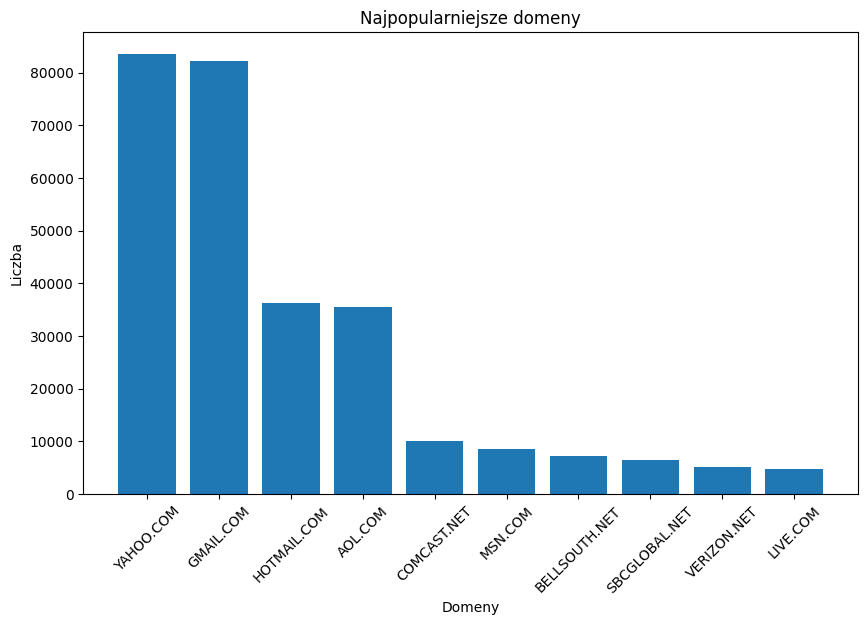

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from datasets import load_dataset
dane = load_dataset("Josephgflowers/CENSUS-NER-Name-Email-Address-Phone", split="train")
df = dane.to_pandas()
#Tworzymy proste wyrażenie regularne regex jak na Lingwistyce do odczytu maili 
mail_wyrazenie = r'(\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b)'
def wyodrebnienie_mail(df, regex):
    maile = df['user'].dropna().str.extractall(regex)[0]
    return maile

domeny_wyrazenie = r'@([A-Za-z0-9.-]+\.[A-Za-z]{2,})'
def wyodrebnienie_domen(df, regex):
    domeny = df.str.extract(regex)[0]
    return domeny

wydorebnione_maile = wyodrebnienie_mail(df, mail_wyrazenie)
wyodrebnione_domeny = wyodrebnienie_domen(wydorebnione_maile, domeny_wyrazenie)
liczba = Counter(wyodrebnione_domeny)
#zrobmy wykres do tego trzeba DF miec 
domeny_df = pd.DataFrame(liczba.items(), columns=['Domeny', 'Liczba']).sort_values(by='Liczba', ascending=False)
domeny_df = domeny_df.head(10)
#Wykres
plt.figure(figsize=(10, 6))
plt.bar(domeny_df['Domeny'], domeny_df['Liczba'])
plt.title("Najpopularniejsze domeny")
plt.xlabel("Domeny")
plt.ylabel("Liczba")
plt.xticks(rotation=45)
plt.show()

